***2nd Question***

***Generate the dataset on your own containing 200 training instances and 200 test***

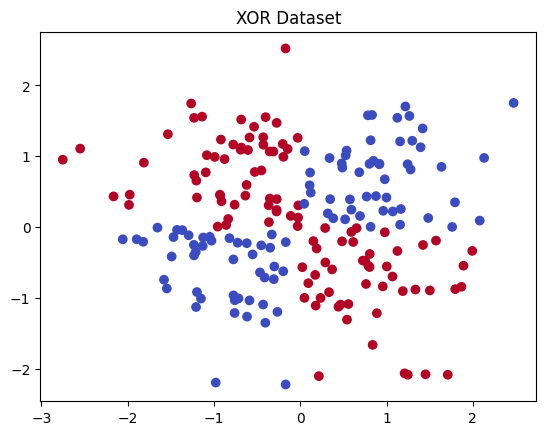

In [283]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate XOR dataset
def generate_xor(n_samples):
    X = np.random.randn(n_samples, 2)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    return X, y

# Create train and test sets
X, y = generate_xor(400)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Plot dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title("XOR Dataset")
plt.show()

In [284]:
# Check the shape of train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (200, 2)
y_train shape: (200,)
X_test shape: (200, 2)
y_test shape: (200,)


**a) A MLP Model**

A Multilayer Perceptron (MLP) is a type of artificial neural network characterized by multiple layers of interconnected nodes, or neurons, that facilitate supervised learning for tasks such as classification and regression. The MLP consists of an input layer, which receives the features of the data, one or more hidden layers that process these inputs through weighted sums followed by nonlinear activation functions, and an output layer that generates the final predictions. During training, the MLP performs forward propagation to compute outputs and calculate the loss by comparing predictions to true labels. This is followed by backpropagation, where gradients of the loss with respect to the network's weights are computed to update the weights using optimization algorithms.








In [285]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Reshape for BCELoss
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: torch.Size([200, 2])
y_train shape: torch.Size([200, 1])


In [286]:
# Defining MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(2, 8)
        self.layer2 = nn.Linear(8, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.output(x))
        return x

model = MLP()
print(model)

MLP(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
)


In [287]:
# Initialize model, loss function, and optimizer
# Binary Cross-Entropy Loss
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss function and optimizer initialized.")

Loss function and optimizer initialized.


In [288]:
# Training the model
epochs = 400
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/400], Loss: 0.6987
Epoch [20/400], Loss: 0.6954
Epoch [30/400], Loss: 0.6923
Epoch [40/400], Loss: 0.6892
Epoch [50/400], Loss: 0.6861
Epoch [60/400], Loss: 0.6827
Epoch [70/400], Loss: 0.6788
Epoch [80/400], Loss: 0.6743
Epoch [90/400], Loss: 0.6691
Epoch [100/400], Loss: 0.6631
Epoch [110/400], Loss: 0.6563
Epoch [120/400], Loss: 0.6486
Epoch [130/400], Loss: 0.6401
Epoch [140/400], Loss: 0.6307
Epoch [150/400], Loss: 0.6206
Epoch [160/400], Loss: 0.6096
Epoch [170/400], Loss: 0.5979
Epoch [180/400], Loss: 0.5855
Epoch [190/400], Loss: 0.5727
Epoch [200/400], Loss: 0.5595
Epoch [210/400], Loss: 0.5457
Epoch [220/400], Loss: 0.5315
Epoch [230/400], Loss: 0.5168
Epoch [240/400], Loss: 0.5017
Epoch [250/400], Loss: 0.4864
Epoch [260/400], Loss: 0.4710
Epoch [270/400], Loss: 0.4558
Epoch [280/400], Loss: 0.4409
Epoch [290/400], Loss: 0.4263
Epoch [300/400], Loss: 0.4121
Epoch [310/400], Loss: 0.3981
Epoch [320/400], Loss: 0.3846
Epoch [330/400], Loss: 0.3716
Epoch [340/400], Lo

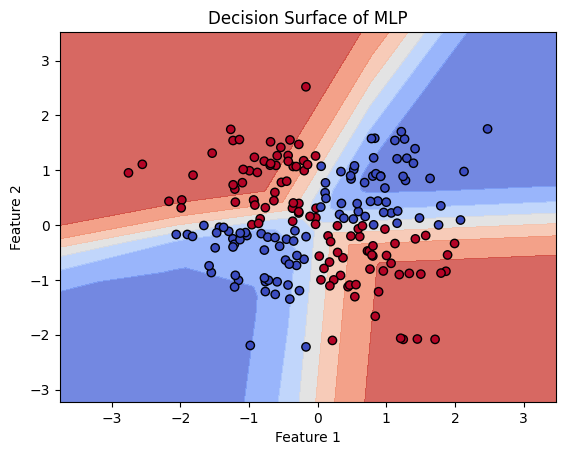

In [289]:
def plot_decision_surface(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Use the model to predict across the meshgrid
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid).cpu().numpy()
    Z = Z.reshape(xx.shape)

    # Plot decision surface
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title("Decision Surface of MLP")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision surface with training data
plot_decision_surface(model, X_train.numpy(), y_train.numpy().ravel())

In [290]:
# Evaluation on test data
model.eval()
with torch.no_grad():
    output_test = model(X_test)
    test_loss = criterion(output_test, y_test)
    test_acc = ((output_test > 0.5).float() == y_test).float().mean()
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.3305, Test Accuracy: 0.9300


This is the plot showing the Decision surface of a normal Multi-Layer Perceptron (MLP), which is trained on an XOR dataset. Basically XOR dataset is a non linearly separable mean that we can't draw a straight line for separating two different classes. It would not be possible with a single-layer perceptron or linear model.  

Here in the plot MLP has tried to form somewhat curved decision boundary to separate the two classes, eventhough it is not separated perfectly. The blue and red regions represent the areas where the model classifies points as belonging to one class or the other. Also the model is captured the shape of the XOR function, separating the upper-right and lower-left clusters (belonging to one class) from the upper-left and lower-right clusters (belonging to the other class).

The decision boundary is relatively smooth, indicating that the model learned to classify the XOR dataset without overfitting excessively. MLP has learned to separate the classes, but there may still be some misclassifications along the boundary.

**b) MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)**

L1 regularization, also known as Lasso regularization, is a technique used in machine learning and statistical modeling to prevent overfitting and improve model interpretability. It works by adding a penalty term to the loss function, proportional to the absolute values of the model's coefficients (weights). This modification encourages the model to keep weights small, promoting sparsity by effectively driving some weights to zero, which simplifies the model and helps identify the most important features. Although L1 regularization can improve clarity and toughness, it also affects optimization by introducing non-differentiability at zero and may cause bias if the regularization parameter is set very high.

In [312]:
# Split training data into training and validation
X_train, X_val = X_train[:150], X_train[150:]  # 150 training, 50 validation
y_train, y_val = y_train[:150], y_train[150:]

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Reshape for BCELoss
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: torch.Size([150, 2])
y_train shape: torch.Size([150, 1])
X_val shape: torch.Size([0, 2])
y_val shape: torch.Size([0, 1])


<ipython-input-312-25ac56081e91>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-312-25ac56081e91>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
<ipython-input-312-25ac56081e91>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-312-25ac56081e91>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sour

In [341]:
# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(2, 8)
        self.layer2 = nn.Linear(8, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.output(x))
        return x

In [342]:
# L1 regularization function
def l1_regularization(model, lambda_l1):
    l1_norm = sum(torch.norm(param, 1) for param in model.parameters())
    return lambda_l1 * l1_norm

# Initialize model and optimizer
model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

# Set the range for penalty coefficients
l1_penalty_coefficients = [0.0, 0.001, 0.01, 0.1]
best_val_loss = float('inf')
best_lambda = 0.0

# Training loop for hyperparameter tuning
epochs = 400
for lambda_l1 in l1_penalty_coefficients:
    print(f'Training with L1 penalty coefficient: {lambda_l1}')

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)

        # Compute loss with L1 regularization
        loss = criterion(output, y_train) + l1_regularization(model, lambda_l1)
        loss.backward()
        optimizer.step()

Training with L1 penalty coefficient: 0.0
Training with L1 penalty coefficient: 0.001
Training with L1 penalty coefficient: 0.01
Training with L1 penalty coefficient: 0.1


In [343]:
# Validation loss
model.eval()
with torch.no_grad():
    val_output = model(X_val)
    val_loss = criterion(val_output, y_val) + l1_regularization(model, lambda_l1)

print(f'Validation Loss for λ={lambda_l1}: {val_loss.item():.4f}')

Validation Loss for λ=0.1: nan


In [344]:
# Check if the current validation loss is the best
if val_loss < best_val_loss:
    best_val_loss = val_loss
    best_lambda = lambda_l1

print(f"Best L1 penalty coefficient: {best_lambda}")

Best L1 penalty coefficient: 0.0


In [345]:
# Train the model with the best lambda
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)

    # Compute loss with L1 regularization
    loss = criterion(output, y_train) + l1_regularization(model, best_lambda)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/400], Loss: 0.6933
Epoch [20/400], Loss: 0.6924
Epoch [30/400], Loss: 0.6923
Epoch [40/400], Loss: 0.6923
Epoch [50/400], Loss: 0.6923
Epoch [60/400], Loss: 0.6922
Epoch [70/400], Loss: 0.6922
Epoch [80/400], Loss: 0.6922
Epoch [90/400], Loss: 0.6922
Epoch [100/400], Loss: 0.6922
Epoch [110/400], Loss: 0.6921
Epoch [120/400], Loss: 0.6921
Epoch [130/400], Loss: 0.6921
Epoch [140/400], Loss: 0.6920
Epoch [150/400], Loss: 0.6920
Epoch [160/400], Loss: 0.6919
Epoch [170/400], Loss: 0.6918
Epoch [180/400], Loss: 0.6917
Epoch [190/400], Loss: 0.6916
Epoch [200/400], Loss: 0.6914
Epoch [210/400], Loss: 0.6911
Epoch [220/400], Loss: 0.6908
Epoch [230/400], Loss: 0.6903
Epoch [240/400], Loss: 0.6896
Epoch [250/400], Loss: 0.6886
Epoch [260/400], Loss: 0.6872
Epoch [270/400], Loss: 0.6848
Epoch [280/400], Loss: 0.6810
Epoch [290/400], Loss: 0.6746
Epoch [300/400], Loss: 0.6632
Epoch [310/400], Loss: 0.6431
Epoch [320/400], Loss: 0.6089
Epoch [330/400], Loss: 0.5508
Epoch [340/400], Lo

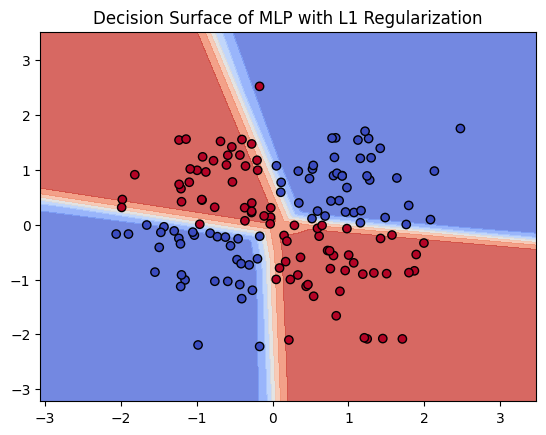

In [346]:
def plot_decision_surface_pytorch(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid).cpu().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title("Decision Surface of MLP with L1 Regularization")
    plt.show()

plot_decision_surface_pytorch(model, X_train.numpy(), y_train.numpy())

In [347]:
# Evaluate on test data
model.eval()
with torch.no_grad():
    output_test = model(X_test)
    test_loss = criterion(output_test, y_test) + l1_regularization(model, best_lambda)
    test_acc = ((output_test > 0.5).float() == y_test).float().mean()
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.1710, Test Accuracy: 0.9450


This plot shows the decision surface of an MLP with L1 regularization applied. L1 regularization encourages sparsity in the model weights, which can simplify the model and prevent it from overfitting.

Comparaing to nomal MLP model, this model has smoother and less complex decision boundary between the claases.

The blue and red regions, representing the two classes, still separate the clusters correctly byt some slight underfitting, particularly near the boundary where the two classes meet. Misclassifications could occur in these areas where the model's flexibility is restricted.

**c) MLP w/ L2 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)**

L2 regularization, also known as Ridge regularization, is a technique used in machine learning to help prevent overfitting, which occurs when a model learns the training data too well and performs poorly on new data. It works by adding a penalty to the loss function that the model tries to minimize, which discourages the model from assigning large weights to any of the features. This penalty is calculated as the sum of the squares of the weights multiplied by a regularization parameter
λ. By doing this, L2 regularization encourages the model to keep all features but with smaller weights, making the model simpler and more stable. Unlike L1 regularization, which can eliminate some features by setting their weights to zero, L2 regularization retains all features in the model, ensuring that all input data contributes to the predictions.

In [400]:
# L2 regularization function
def l2_regularization(model, lambda_l2):
    l2_norm = sum(torch.norm(param, 2) ** 2 for param in model.parameters())
    return lambda_l2 * l2_norm

# Initialize model and optimizer
model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the range for penalty coefficients
l2_penalty_coefficients = [0.0, 0.001, 0.01, 0.1]
best_val_loss = float('inf')
best_lambda = 0.0

# Training loop for hyperparameter tuning
epochs = 600
for lambda_l2 in l2_penalty_coefficients:
    print(f'Training with L2 penalty coefficient: {lambda_l2}')

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)

        # Compute loss with L2 regularization
        loss = criterion(output, y_train) + l2_regularization(model, lambda_l2)
        loss.backward()
        optimizer.step()

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_loss = criterion(val_output, y_val) + l2_regularization(model, lambda_l2)

    print(f'Validation Loss for λ={lambda_l2}: {val_loss.item():.4f}')

Training with L2 penalty coefficient: 0.0
Validation Loss for λ=0.0: nan
Training with L2 penalty coefficient: 0.001
Validation Loss for λ=0.001: nan
Training with L2 penalty coefficient: 0.01
Validation Loss for λ=0.01: nan
Training with L2 penalty coefficient: 0.1
Validation Loss for λ=0.1: nan


In [401]:
# Check if the current validation loss is the best
if val_loss < best_val_loss:
   best_val_loss = val_loss
   best_lambda = lambda_l2

print(f"Best L2 penalty coefficient: {best_lambda}")

Best L2 penalty coefficient: 0.0


In [410]:
# Train the model with the best lambda
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)

    # Compute loss with L2 regularization
    loss = criterion(output, y_train) + l2_regularization(model, best_lambda)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/600], Loss: 0.1883
Epoch [20/600], Loss: 0.1830
Epoch [30/600], Loss: 0.1779
Epoch [40/600], Loss: 0.1731
Epoch [50/600], Loss: 0.1686
Epoch [60/600], Loss: 0.1642
Epoch [70/600], Loss: 0.1599
Epoch [80/600], Loss: 0.1556
Epoch [90/600], Loss: 0.1516
Epoch [100/600], Loss: 0.1477
Epoch [110/600], Loss: 0.1440
Epoch [120/600], Loss: 0.1404
Epoch [130/600], Loss: 0.1371
Epoch [140/600], Loss: 0.1339
Epoch [150/600], Loss: 0.1308
Epoch [160/600], Loss: 0.1279
Epoch [170/600], Loss: 0.1251
Epoch [180/600], Loss: 0.1223
Epoch [190/600], Loss: 0.1198
Epoch [200/600], Loss: 0.1173
Epoch [210/600], Loss: 0.1149
Epoch [220/600], Loss: 0.1126
Epoch [230/600], Loss: 0.1105
Epoch [240/600], Loss: 0.1084
Epoch [250/600], Loss: 0.1063
Epoch [260/600], Loss: 0.1044
Epoch [270/600], Loss: 0.1025
Epoch [280/600], Loss: 0.1007
Epoch [290/600], Loss: 0.0989
Epoch [300/600], Loss: 0.0972
Epoch [310/600], Loss: 0.0955
Epoch [320/600], Loss: 0.0939
Epoch [330/600], Loss: 0.0923
Epoch [340/600], Lo

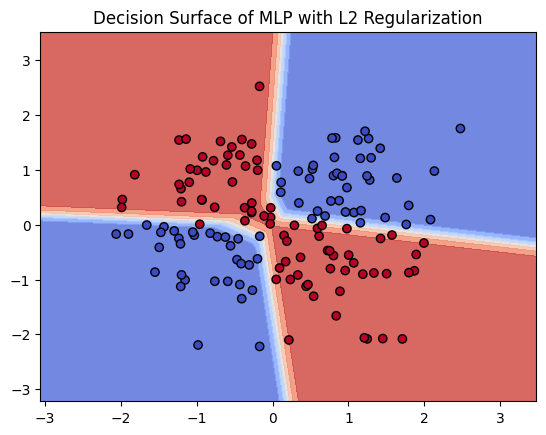

In [411]:
def plot_decision_surface_pytorch(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid).cpu().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title("Decision Surface of MLP with L2 Regularization")
    plt.show()

plot_decision_surface_pytorch(model, X_train.numpy(), y_train.numpy())

In [412]:
# Evaluate on test data
model.eval()
with torch.no_grad():
    output_test = model(X_test)
    test_loss = criterion(output_test, y_test) + l2_regularization(model, best_lambda)
    test_acc = ((output_test > 0.5).float() == y_test).float().mean()
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0960, Test Accuracy: 0.9650


This plot shows the decision surface of an MLP with L2 regularization applied.

In this plot the decision boundary is again smooth and slightly simpler than the L1 regularization, but it retains more flexibility. The boundary is less sharp, with a smoother gradient between the two classes.

The MLP with L2 regularization achieves a good balance between flexibility and generalization. It captures the XOR structure effectively with a smooth and simplified decision boundary, minimizing the risk of overfitting while maintaining accuracy. This makes L2 regularization a useful choice for improving the generalization of models on non-linear XOR without losing too much detail in the decision boundary.

**d) Learn logistic regression models on the same data with additional features (such as x1*x2, x1^2, etc.)**

Logistic regression is a statistical method used for binary classification, where the goal is to predict the probability that a given input belongs to a specific category, such as yes/no or 0/1 and also by minimizing the loss function by adjusting the model's weights.

Logistic regression uses the logistic (or sigmoid) function to convert linear combinations of input features into probabilities. The output of this function ranges between 0 and 1, indicating the likelihood that the input falls into the positive class. If this probability exceeds a defined threshold (commonly 0.5), the model classifies the input as positive; otherwise, it classifies it as negative. During training, logistic regression employs a loss function called log loss (or binary cross-entropy) to assess the difference between predicted probabilities and actual labels, optimizing the model using algorithms like gradient descent to find the best-fitting weights.

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create additional features
def create_features(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    return np.column_stack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))

# Augment training and testing features
X_train_augmented = create_features(X_train)
X_test_augmented = create_features(X_test)

# Train Logistic Regression model
log_reg_model = LogisticRegression(solver='lbfgs')
log_reg_model.fit(X_train_augmented, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

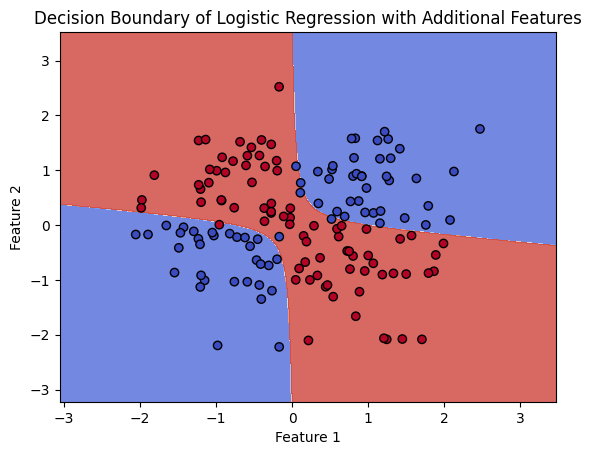

In [430]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Create augmented grid for predictions
    grid = create_features(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title("Decision Boundary of Logistic Regression with Additional Features")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision boundary
plot_decision_boundary(log_reg_model, X_train, y_train)

In [431]:
# Evaluate on test data
model.eval()
with torch.no_grad():
    output_test = model(X_test)
    test_loss = criterion(output_test, y_test) + l2_regularization(model, best_lambda)
    test_acc = ((output_test > 0.5).float() == y_test).float().mean()
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0960, Test Accuracy: 0.9650


This plot shows the decision boundary for a logistic regression model with polynomial features on the XOR dataset.By adding polynomial features (e.g., x1*x2 etc.), logistic regression can create a more complex boundary than linear logistic regression would typically allow. This enables it to separate the red and blue classes effectively.

These model had a good decision boundary that distinguishes the classes well, with red regions for one class and blue regions for the other. However, compared to other models it might still be limited in flexibility for highly complex patterns beyond XOR.

In [438]:
# Generate degree-3 polynomial features for better separation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train.numpy())
X_test_poly = poly.transform(X_test.numpy())

# Convert polynomial features to PyTorch tensors
X_train_poly_tensor = torch.tensor(X_train_poly, dtype=torch.float32)
X_test_poly_tensor = torch.tensor(X_test_poly, dtype=torch.float32)

# Convert labels to tensors with correct shape
y_train_tensor = torch.tensor(y_train.numpy(), dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.numpy(), dtype=torch.float32).view(-1, 1)

print("X_train_poly_tensor shape:", X_train_poly_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)

class LogisticRegressionPoly(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionPoly, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

# Initialize the logistic regression model
log_reg_model = LogisticRegressionPoly(X_train_poly.shape[1])

# Set up optimizer and loss function
optimizer = optim.Adam(log_reg_model.parameters(), lr=0.01)
criterion = nn.BCELoss()  # Define the loss function

# Training loop for logistic regression with polynomial features
epochs = 500
for epoch in range(epochs):
    log_reg_model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = log_reg_model(X_train_poly_tensor)

    # Compute loss
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    # Print loss every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

X_train_poly_tensor shape: torch.Size([150, 5])
y_train_tensor shape: torch.Size([150, 1])
Epoch [0/500], Loss: 0.8211
Epoch [50/500], Loss: 0.6355
Epoch [100/500], Loss: 0.5303
Epoch [150/500], Loss: 0.4616
Epoch [200/500], Loss: 0.4136
Epoch [250/500], Loss: 0.3779
Epoch [300/500], Loss: 0.3500
Epoch [350/500], Loss: 0.3275
Epoch [400/500], Loss: 0.3087
Epoch [450/500], Loss: 0.2927


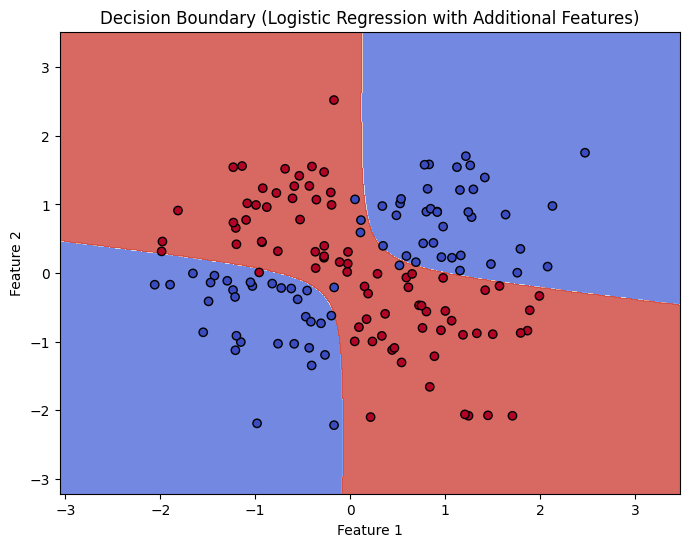

In [439]:
def plot_decision_surface_with_poly(model, X, y, poly_transformer):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Apply polynomial transformation to the grid
    grid = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    # Predict on the grid
    with torch.no_grad():
        Z = model(grid_tensor).cpu().numpy()
    Z = Z.reshape(xx.shape)

    # Classify the grid points based on 0.5 threshold
    Z_class = (Z > 0.5).astype(int)

    # Plot decision boundary and scatter plot of training data
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_class, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title("Decision Boundary (Logistic Regression with Additional Features)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision surface
plot_decision_surface_with_poly(log_reg_model, X_train.numpy(), y_train.numpy(), poly)

In [440]:
# Evaluate on test data
model.eval()
with torch.no_grad():
    output_test = model(X_test)
    test_loss = criterion(output_test, y_test) + l2_regularization(model, best_lambda)
    test_acc = ((output_test > 0.5).float() == y_test).float().mean()
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0960, Test Accuracy: 0.9650
